## Data606 - Capstone Project
```
Group H
Malav Patel, Kent Butler
Prof. Unal Sokaglu
```

This project is about performing time-series analysis on climate data analysis data.



# Research

### References

Some explanations of earth sciences statistics:
https://pjbartlein.github.io/REarthSysSci/ltms-and-anomalies.html

NOAA PSL NCEP-NCAR datasets:  https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html

NOAA PSL, other recognized data sources directory: https://psl.noaa.gov/data/help/othersources/

Global environmental policy timeline, https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline

OECD convergence of policy, climate,and economy: https://www.oecd.org/

NASA climate time machine: https://climate.nasa.gov/interactives/climate-time-machine

### Factoids

* All of the plastic waste produced in the world in 2019 alone weighs as much as 35,000 Eiffel Towers – 353 million tons  - [*Organization for Economic Cooperation and Development (OECD)*](https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline)



## Application Parameters

Note: algorithm tuning is done with declaration of the model.

In [ ]:
import pandas as pd
from datetime import datetime as dt
import datetime

In [ ]:
debug = True

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_ROOT = DRIVE_PATH + "/data/"

# Model to use
MODEL_NAME = 'Densev1'
#MODEL_NAME = 'TXERv1'
# MODEL_NAME = 'LSTMv3'

# Location of logged output prediction data
LOG_PATH = DATA_ROOT + "/preds/"

# Journal file
JOURNAL_LOG = SCRIPT_PATH + "cv-results.csv"

# Device to run on
run_on_device =  'cpu' # 'cuda'

# Bound datasets by these dates
START_DATE =  pd.to_datetime(dt.fromisoformat('1950-01-01'))
END_DATE = pd.to_datetime(dt.fromisoformat('2015-12-01'))
# These work for Berkely temp data
#START_DATE =  pd.to_datetime(dt.fromisoformat('1950-01-01'))
#END_DATE = pd.to_datetime(dt.fromisoformat('2015-12-01'))



---

**Model Configuration**

---

**Basic model params**

In [ ]:
# History lookback in network
INPUT_WINDOW = 60
# How far forward to predict
LABEL_WINDOW = 48
# How many to move forward for start of next label
SHIFT = 5
# Ratio of test data to train data - used for split
TEST_RATIO = 0.2
# 0..1 percent of data to use as validation
VALIDATION_RATIO = 0.1
# Num epochs
NUM_EPOCHS = 300

**Configure Predictions**

In [ ]:
# Label to predict
TARGET_LABEL = 'val1'
TARGET_LABELS = ['val1']
#TARGET_LABEL = 'storm_type'
#TARGET_LABELS = ['storm_type']

#TARGET_LABEL = 'landSeaAvgTemp'
#TARGET_LABELS = ['landSeaAvgTemp']

# Base dataset
TEMP_DATA = {'filename':'GlobalTemperatures.csv',
             'feature_map':{'LandAndOceanAverageTemperature':'landSeaAvgTemp'},
             'date_col':'dt'}
#TEMP_DATA = {'filename':'GlobalTemperatures.csv',
#              'feature_map':{'LandAverageTemperature':'landAvgTemp',	'LandMaxTemperature':'landMaxTemp',	'LandMinTemperature':'landMinTemp',	'LandAndOceanAverageTemperature':'landSeaAvgTemp'},
#               'date_col':'dt'}


# Datasets
CO2_DATA = {'filename':"atmospheric-co2.csv",
            'feature_map':{'Carbon Dioxide (ppm)':'co2', 'Seasonally Adjusted CO2 (ppm)':'co2_seas'},
            'date_map':{'Year':'year','Month':'month'}}

SEAICE_DATA = {'filename':"seaice.csv",
               'feature_map':{'     Extent':'ice_extent'},
               'date_map':{' Month':'month','Year':'year',' Day':'day'}}

WEATHER_DATA = {'filename':"finalDatasetWithRain.csv",
                'feature_map':{'air_x':'air_x','uwnd_y':'uwind','pres_x.1':'press','vwnd_y':'vwind','rain':'rain'},
                'date_col':'time'}

VOLCANO_DATA = {'filename':'eruptions-conditioned.csv',
                'feature_map':{'vei':'volcanic_idx'},
                'date_map':{'start_year':'year','start_month':'month'}}

FOREST_DATA = {'filename':'WorldForestCover-Interpolated.csv',
               'feature_map':{'PctCover-Int':'pct_forest_cover'},
               'date_col':'date'}

SUNSPOT_DATA = {'filename':'sunspotnumber.csv',
               'feature_map':{'suns_spot_number':'sunspot_num'},
               'date_map':{'year':'year'}}

POLICY_DATA = {'filename':'GlobalEnvPolicies.csv',
               'feature_map':{'EventRating':'policy_rate'},
               'date_col':'date'}

HURRICANE_DATA = {'filename':'nhc.noaa.gov-dates-processed.csv',
                  'feature_map':{'type_code':'storm_type'},
                  #'feature_map':{'lat_deg':'lat', 'long_deg':'long', 'type_code':'storm_type'},
                  'date_col':'dateobj'}

CARIBE_TEMP_DATA = {'filename':'GlobalLandTemperaturesByCity-caribe.csv',
                     'feature_map':{'LandAndOceanAverageTemperature':'landSeaAvgTemp'},
                   'date_col':'dt'}

#GHG_DATA = {'filename':'greenhouse_gas_inventory_data.csv',
#            'feature_map':{''},
#            'date_map':{'Year':'year'}}

# MANU  DATASETS

LINEAR_DATA = {'filename':'gen-linear.csv',
               'feature_map':{'val1':'val1'},
               'date_col':'date'}
SERIES_DATA = {'filename':'gen-series.csv',
               'feature_map':{'val1':'val1'},
               'date_col':'date'}
RANDOM_DATA = {'filename':'gen-rand.csv',
               'feature_map':{'val1':'val1','val2':'val2'},
               'date_col':'date'}
RADIAL_DATA = {'filename':'gen-radial.csv',
               'feature_map':{'val1':'val1','val2':'val2'},
               'date_col':'date'}

#ALL_DATASETS = []
#ALL_DATASETS = [SUNSPOT_DATA]
ALL_DATASETS = [LINEAR_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, WEATHER_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, VOLCANO_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, WEATHER_DATA, VOLCANO_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, WEATHER_DATA, VOLCANO_DATA, FOREST_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, WEATHER_DATA, VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA]
#ALL_DATASETS = [VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA]
#ALL_DATASETS = [VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA, CO2_DATA]
#ALL_DATASETS = [VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA, CO2_DATA, SEAICE_DATA]
#ALL_DATASETS = [CO2_DATA, SEAICE_DATA, VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA]
#ALL_DATASETS = [WEATHER_DATA,CO2_DATA, SEAICE_DATA, VOLCANO_DATA, FOREST_DATA, SUNSPOT_DATA]

#ALL_DATASETS = [POLICY_DATA,CO2_DATA]


In [ ]:
INITIAL_DATASET = LINEAR_DATA #HURRICANE_DATA  #TEMP_DATA
FREQ = '1D'  #'1M'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd $SCRIPT_PATH

/content/drive/MyDrive/data606/src


In [ ]:
# Load util class
%run -i "./ProjectUtil.ipynb"

In [ ]:
# Load util class
%run -i "./WindowGenerator.ipynb"

# Data Load

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
import warnings

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

---

**Initial Data Load**

---

In [ ]:
# Load util class
%run -i "./Dataset_Merger.ipynb"

In [ ]:
# Declare a merger compatible with our source data and our target dataset we want to merge into
merger = Dataset_Merger(data_path=DATA_ROOT, start_date=START_DATE, end_date=END_DATE, freq=FREQ, debug=True)

------------------------------------------
 ###  ============================================================
  Loading data/content/drive/MyDrive/data606/data/gen-linear.csv

 ### Defaulting df_aggr to reference df
------------------------------------------
 ### Renaming columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   val1        20000 non-null  int64 
 2   date        20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB
------------------------------------------
 ### preprocess_dates with date_col: date
 ### Convert from given col date
------------------------------------------
 ### Creating std date columns
 ### ## Case 2 for df::
<bound method DataFrame.info of        Unnamed: 0   val1        date     _date_
0               0      0  1950-01-01 1950-01-01
1              

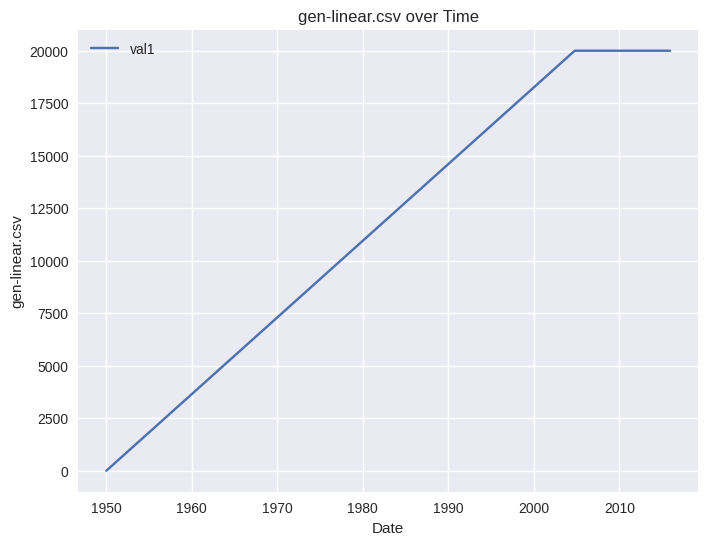

------------------------------------------
 ### assess_granularity for cols: ['val1']
 ### After grouping y/m/d: 24076
 ### After grouping y/m: 792
 ### After grouping y: 66
Dataset assessed at timestep freq: D


In [ ]:
# Start by merging initial dataset
df_merge = merger.merge_dataset(INITIAL_DATASET['filename'],
                                INITIAL_DATASET['feature_map'],
                                 date_col=INITIAL_DATASET['date_col'],
                                 add_cyclic=True,
                                 scaling_aggr='sum')

# And store an indication of what our step scale is
cols = list(INITIAL_DATASET['feature_map'].values())
STEP_FREQ = merger.assess_granularity(df_merge, cols)

In [ ]:
print(assess_na(df_merge))

  _date_  day year month val1 day-sin day-cos
0    0.0  0.0  0.0   0.0  0.0     0.0     0.0


---

**Merge Additional Data**

---

------------------------------------------
 ###  ============================================================
  Loading data/content/drive/MyDrive/data606/data/gen-linear.csv

------------------------------------------
 ### Renaming columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   val1        20000 non-null  int64 
 2   date        20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB
------------------------------------------
 ### preprocess_dates with date_col: date
 ### Convert from given col date
------------------------------------------
 ### Creating std date columns
 ### ## Case 2 for df::
<bound method DataFrame.info of        Unnamed: 0   val1        date     _date_
0               0      0  1950-01-01 1950-01-01
1               1      1  1950-01-02 1950-01-02
2      

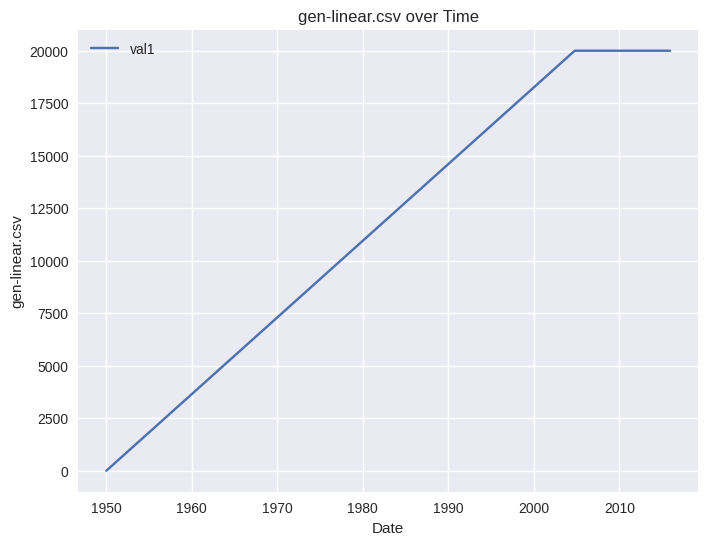

  _date_  day year month val1 day-sin day-cos
0    0.0  0.0  0.0   0.0  0.0     0.0     0.0


In [ ]:
for dataset in ALL_DATASETS:
  if ('date_map' in dataset):
    df_merge = merger.merge_dataset(dataset['filename'],
                                    feature_map=dataset['feature_map'],
                                    df_aggr=df_merge,
                                    date_map=dataset['date_map'])
  else:
    df_merge = merger.merge_dataset(dataset['filename'],
                                feature_map=dataset['feature_map'],
                                df_aggr=df_merge,
                                date_col=dataset['date_col'])
  print(assess_na(df_merge))

In [ ]:
df_merge

,_date_,day,year,month,val1,day-sin,day-cos
0,1950-01-01,1,1950,1,0.0,5.000000e-01,8.660254e-01
1,1950-01-02,2,1950,1,1.0,8.660254e-01,5.000000e-01
2,1950-01-03,3,1950,1,2.0,1.000000e+00,6.123234e-17
3,1950-01-04,4,1950,1,3.0,8.660254e-01,-5.000000e-01
4,1950-01-05,5,1950,1,4.0,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...
24071,2015-11-27,27,2015,11,19999.0,1.000000e+00,2.327448e-15
24072,2015-11-28,28,2015,11,19999.0,8.660254e-01,-5.000000e-01
24073,2015-11-29,29,2015,11,19999.0,5.000000e-01,-8.660254e-01
24074,2015-11-30,30,2015,11,19999.0,2.388680e-15,-1.000000e+00


---

**Assess correlations**

---

In [ ]:
# Assess correlations between all data columns
df_corr = df_merge.corr()

In [ ]:
# Identify the columns which have medium to strong correlation with target
df_corr_cols = df_corr[df_corr[TARGET_LABEL] > 0.5]

In [ ]:
# Drop the target from the correlation results in case we want to use this reduced set
#    in place of the full set
df_corr_cols = df_corr_cols.drop(columns=[])

In [ ]:
# Extract just the column names
corr_cols = df_corr_cols.index.values

In [ ]:
if debug:
  print(corr_cols)

['year' 'val1']


Text(0.5, 1.0, 'Heatmap of correlation among variables')

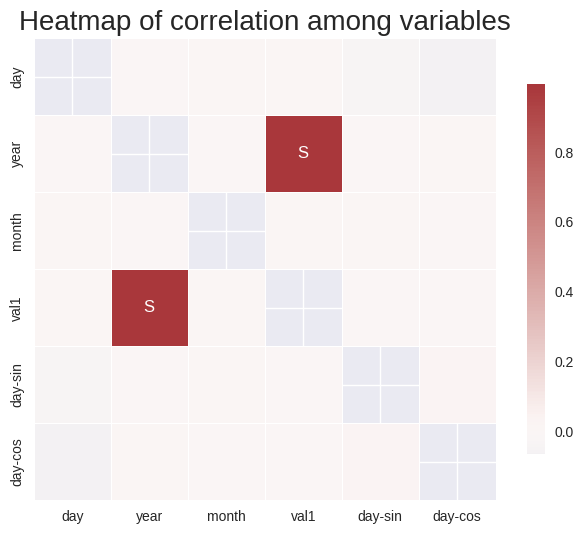

In [ ]:
# Add labels
labels = np.where(np.abs(df_corr) > 0.75, 'S',
                  np.where(np.abs(df_corr) > 0.5, 'M',
                           np.where(np.abs(df_corr) > 0.25, 'W', '')))
# Plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt = '', linewidths = .5,
            cmap='vlag', cbar_kws={'shrink':0.8});
plt.title('Heatmap of correlation among variables', fontsize=20)

---

**Prepare for Modeling**

---

In [ ]:
# It's time to set date as index and remove from dataset
df_merge.set_index(merger.DATE_COL, inplace=True, drop=True)

In [ ]:
df_merge

,day,year,month,val1,day-sin,day-cos
_date_,,,,,,
1950-01-01,1,1950,1,0.0,5.000000e-01,8.660254e-01
1950-01-02,2,1950,1,1.0,8.660254e-01,5.000000e-01
1950-01-03,3,1950,1,2.0,1.000000e+00,6.123234e-17
1950-01-04,4,1950,1,3.0,8.660254e-01,-5.000000e-01
1950-01-05,5,1950,1,4.0,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...
2015-11-27,27,2015,11,19999.0,1.000000e+00,2.327448e-15
2015-11-28,28,2015,11,19999.0,8.660254e-01,-5.000000e-01
2015-11-29,29,2015,11,19999.0,5.000000e-01,-8.660254e-01


**Assess Periodicity**

```
# removed kendalltau analysis
# Replace with fft graph of major freqs?
```


**Resampling**

This is being performed during the dataset merging phase.

Ready for time series modeling.

---

**Data conversion for model**

---

**Extract labels**

Time series creates a supervised learning problem out of moving data.

**Dataset stats**

In [ ]:
NUM_FEATURES = len(df_merge.columns)

# Capture stats on number of non-metadata columns - so, exclude some stuff
#NET_NUM_FEATURES = len(set(df_merge.columns) - set(['year','month','day']))

In [ ]:
# Keep rows aside for post validation?
TOTAL_ROWS = df_merge.shape[0]
NUM_VALIDATION = math.floor(TOTAL_ROWS * VALIDATION_RATIO)
WORKING_ROWS = TOTAL_ROWS - NUM_VALIDATION

In [ ]:
# Split non-validation rows into train/test
NUM_TEST = math.floor(WORKING_ROWS * TEST_RATIO)
NUM_TRAIN = WORKING_ROWS - NUM_TEST

In [ ]:
print(f'Num features: {NUM_FEATURES}')
print(f'Total rows: {TOTAL_ROWS}')
print(f'Validation rows: {NUM_VALIDATION}')
print(f'Train rows: {NUM_TRAIN}')
print(f'Test rows: {NUM_TEST}')

Num features: 6
Total rows: 24076
Validation rows: 2407
Train rows: 17336
Test rows: 4333


**Split into Train/Test**

In [ ]:
df_train = df_merge.iloc[:NUM_TRAIN, :]
df_val = df_merge.iloc[NUM_TRAIN:NUM_TRAIN+NUM_VALIDATION, :]
df_test = df_merge.iloc[NUM_TRAIN+NUM_VALIDATION:, :]

In [ ]:
y_train = df_train[TARGET_LABEL]
y_val = df_val[TARGET_LABEL]
y_test = df_test[TARGET_LABEL]

In [ ]:
if debug:
  print(f'df_train: {df_train.shape}')
  print(f'y_train: {y_train.shape}')
  print(f'df_test: {df_test.shape}')
  print(f'y_test: {y_test.shape}')
  print(f'df_val: {df_val.shape}')
  print(f'y_val: {y_val.shape}')

df_train: (17336, 6)
y_train: (17336,)
df_test: (4333, 6)
y_test: (4333,)
df_val: (2407, 6)
y_val: (2407,)


**Scale data**

Doing this **after** the split means that training data doesn't get unfair advantage of looking ahead into the 'future' during test & validation.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer,  QuantileTransformer, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import tensorflow as tf


In [ ]:
# Create small pipeline for numerical features
numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy='mean')),
                                    ('scale', MinMaxScaler())])

In [ ]:
# get names of numerical features
con_lst = df_train.select_dtypes(include='number').columns.to_list()

In [ ]:
# Transformer for applying Pipelines
column_transformer = ColumnTransformer(transformers = [('number', numeric_pipeline, con_lst)])

In [ ]:
# Transform data features
X_train_tx = column_transformer.fit_transform(df_train)
X_test_tx = column_transformer.transform(df_test)
X_val_tx = column_transformer.transform(df_val)
X_train_tx.shape, X_test_tx.shape, X_val_tx.shape

((17336, 6), (4333, 6), (2407, 6))

In [ ]:
# Transform labels
label_scaler = MinMaxScaler()
y_train_tx = label_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# Slice labels - we cannot predict anything inside the first INPUT_WINDOW
#y_train_tx = y_train_tx[INPUT_WINDOW:]

In [ ]:
if debug:
  print(f'X_train_tx {X_train_tx.shape}: {X_train_tx[0]}')
  print(f'y_train_tx {y_train_tx.shape}: {y_train_tx[0]}')

X_train_tx (17336, 6): [0.        0.        0.        0.        0.75      0.9330127]
y_train_tx (17336, 1): [0.]


**Extract X and y**

Normally we would do this by explicitly extracting data from our df.

However for a time series, we're going to create many small supervised learning sets, so a set of X and y pairs.

We should end up with data in a shape ready for batched network input:

`batches X time_steps X features`



In [ ]:
if debug:
  print(f'X_train_tx: {X_train_tx.shape}')
  print(f'y_train_tx: {y_train_tx.shape}')

X_train_tx: (17336, 6)
y_train_tx: (17336, 1)


In [ ]:
NUM_LABELS = y_train_tx.shape[1]

---

**Modeling**

---

In [ ]:
# These are the features we are going to be modeling
COLS = list(df_merge.columns)

**Slice into Batches**

In [ ]:
windower = TfWindowGenerator(input_width=INPUT_WINDOW,
                             label_width=LABEL_WINDOW,
                             shift=SHIFT,
                             batch_size=INPUT_WINDOW,
                             debug=True)

In [ ]:
windower

Window Generator::
	Input size: 60
	Label size: 48
	Shift: 5
	Batch size: 60
	Total window size: 108
	Label start: 64

In [ ]:
X_train_tx.shape, y_train_tx.shape

((17336, 6), (17336, 1))

In [ ]:
ds = windower.get_ds_from_arrays(X_train_tx, y_train_tx)

input_arr: (17336, 6)
label_arr: (17336, 1)
Frames: (17229, 60, 6)
First frame:
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.5000000e-01
  9.3301272e-01]
 [3.3333335e-02 0.0000000e+00 0.0000000e+00 5.7686761e-05 9.3301272e-01
  7.5000000e-01]
 [6.6666670e-02 0.0000000e+00 0.0000000e+00 1.1537352e-04 1.0000000e+00
  5.0000000e-01]
 [1.0000000e-01 0.0000000e+00 0.0000000e+00 1.7306028e-04 9.3301272e-01
  2.5000000e-01]
 [1.3333334e-01 0.0000000e+00 0.0000000e+00 2.3074704e-04 7.5000000e-01
  6.6987298e-02]
 [1.6666667e-01 0.0000000e+00 0.0000000e+00 2.8843380e-04 5.0000000e-01
  0.0000000e+00]
 [2.0000000e-01 0.0000000e+00 0.0000000e+00 3.4612056e-04 2.5000000e-01
  6.6987298e-02]
 [2.3333333e-01 0.0000000e+00 0.0000000e+00 4.0380732e-04 6.6987298e-02
  2.5000000e-01]
 [2.6666668e-01 0.0000000e+00 0.0000000e+00 4.6149408e-04 0.0000000e+00
  5.0000000e-01]
 [3.0000001e-01 0.0000000e+00 0.0000000e+00 5.1918085e-04 6.6987298e-02
  7.5000000e-01]
 [3.3333334e-01 0.0000000e+00 

ValueError: ignored

In [ ]:
# Use tensorflow util to batch the timeseries
# #   note that targets assume first label starts at 0 (vs. targets[INPUT_WINDOW])
# ds = tf.keras.utils.timeseries_dataset_from_array(
#     data=X_train_tx,
#     targets=y_train_tx,
#     batch_size=INPUT_WINDOW*2,
#     sequence_length=INPUT_WINDOW )

In [ ]:
for i,batch in enumerate(ds):
  X,y = batch
  print(f'batch size: {X.shape},{y.shape}')
  if (i == 0):
    print(f'----------- X -------------\n{X[0][0]}')
    print(f'{y[0][0]}')
  break

**Prep GPU**

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

---

**Build and Train**

---

**Build model**

In [ ]:
# Load model class
%run -i "./Model_Base.ipynb"

In [ ]:
%run -i "./ModelFactory.ipynb"

In [ ]:
# Use factory for flexible selection
mf = ModelFactory(window_size=INPUT_WINDOW,label_window=LABEL_WINDOW,num_labels=NUM_LABELS,num_epochs=NUM_EPOCHS,debug=True)

In [ ]:
mf

In [ ]:
print(f'Initializing model: {MODEL_NAME}')
model = mf.get(MODEL_NAME)

In [ ]:
model

**Train model**

In [ ]:
model_history = model.train(dataset=ds, num_features=NUM_FEATURES)

In [ ]:
# Capture stat
num_epochs = len(model_history.history['loss'])

**Test Predictions**

In [ ]:
num_predictions = y_test.shape[0]-INPUT_WINDOW-LABEL_WINDOW
print(f'Num Exp. Predictions: {num_predictions} == {y_test.shape[0]} - {INPUT_WINDOW}')

preds = []
pred_dates = []
y_test_vals = []

In [ ]:
# Defaults to a single Day
STEP_OFFSET = pd.DateOffset()

if (STEP_FREQ == 'M'):
  STEP_OFFSET = pd.DateOffset(months=1)
else:
  STEP_OFFSET = pd.DateOffset(years=1)

In [ ]:
for p in range(num_predictions):
  # Prepare inputs
  print(f'Pred range: x_test_tx[{p}:{p+INPUT_WINDOW}]')
  X_pred = X_test_tx[p:p+INPUT_WINDOW,:].reshape(-1, INPUT_WINDOW, NUM_FEATURES)

  # Prepare outputs
  label_start_index = p+INPUT_WINDOW
  print(f'Exp output: y_test[{label_start_index}:{label_start_index + LABEL_WINDOW}]')
  y_test_vals.append(y_test[label_start_index:label_start_index + LABEL_WINDOW])

  if (LABEL_WINDOW == 1):
    print(f'Pred date: {df_test.index[label_start_index]}')
  else:
    print(f'Pred dates: {df_test.index[label_start_index]} + {LABEL_WINDOW-1} steps')

  # Predict
  batch_preds = model.predict(X_pred)
  print(f'## Batch step: {batch_preds.shape}')
  if (len(batch_preds.shape) > 2):
    #batch_preds = batch_preds[0]
    batch_preds = batch_preds.reshape(LABEL_WINDOW, -1)

  # Re-Scale
  pred_vals = label_scaler.inverse_transform(batch_preds)
  # Reduce to single array
  pred_vals = np.squeeze(pred_vals)

  # if (len(pred_vals.shape) > 1):
  #   #pred_vals = pred_vals.reshape(-1)
  #   pred_vals = pred_vals.ravel()
  print(f'## Pred vals: {pred_vals.shape}\n{pred_vals}')

  if (LABEL_WINDOW == 1):
    preds.append(pred_vals.ravel())
    pred_dates.append(df_test.index[label_start_index])
  else:
    # Add one row per label output; we need to increment the date manually
    pred_start_date = df_test.index[label_start_index]
    step_date = pred_start_date
    for val in pred_vals.tolist():
      # add current result values
      print(f'## val:  type: {type(val)}  value: {val}')
      preds.append(val)
      pred_dates.append(step_date)
      print(f'## Pred: {step_date} {val}')
      # move to next step
      step_date = (step_date + STEP_OFFSET)

In [ ]:
df_all_results = pd.DataFrame({'preds': np.squeeze(preds),
                               'pred_dates':pred_dates
                            })

In [ ]:
if (LABEL_WINDOW != SHIFT):
  # There is probably overlap of output due to this condition
  #   Combine predicted outputs for the same dates
  df_results = df_all_results.groupby(['pred_dates']).mean()
else:
  df_results = df_all_results

In [ ]:
# Move dates out of column and into index, if it exists
if ('pred_dates' in df_results.columns):
  df_results.set_index('pred_dates', drop=True, inplace=True)

In [ ]:
# Reduce df_test to just the columns and dates necessary
df_y = df_retain(df_test, TARGET_LABELS)
df_y = df_y[df_results.index.min():df_results.index.max()]

In [ ]:
# And merge y values into preds
df_results = df_y.merge(df_results, how='inner', left_index=True, right_index=True, suffixes=['', '_dft'])
df_results = df_results.rename({TARGET_LABEL:'y_test'}, axis=1)

In [ ]:
# Finally, reduce to a simple index to make the graphing work nicely
df_results.reset_index(inplace=True, drop=False, names='pred_dates')
# But we need a date label col
date_labels = df_results['pred_dates'].apply(lambda x: x.strftime('%Y-%m-%d')).values
# and now we can drop it
df_results.drop(columns=['pred_dates'], inplace=True)

In [ ]:
df_results

**Analyze results**

In [ ]:
# Plot results
# max points - default to full set
TICK_SPACING=6
fig, ax = plt.subplots(figsize=(12,4), layout="constrained")
sns.lineplot(data=df_results, ax=ax)
ax.set_xticks(df_results.index, labels=date_labels, rotation=90)
ax.xaxis.set_major_locator(plticker.MultipleLocator(TICK_SPACING))
plt.xlabel('Time steps')
plt.ylabel('Predicted values')
#plt.legend(('Test','Predicted'))

**Error Calculations**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
y_test_vals = df_results['y_test'].values
preds = df_results['preds'].values

In [ ]:
# y_test_vals = y_test_vals.reshape(y_test_vals.shape[0],1)
# preds = preds.reshape(preds.shape[0],1)
# y_test_vals.shape, preds.shape

In [ ]:
# Calculate MAPE
m = tf.keras.metrics.MeanAbsolutePercentageError()
try:
  m.update_state(y_test_vals, preds)
except ValueError as ve:
  print(f'ValueError calculating MAPE: {ve}')

In [ ]:
mse = mean_squared_error(y_test_vals, preds)
mae = mean_absolute_error(y_test_vals, preds)
mape = m.result().numpy()/100  # adjust Keras output to match scikit
from sklearn.metrics import mean_absolute_percentage_error
sk_mape = mean_absolute_percentage_error(y_test_vals, preds)

In [ ]:
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'SKMAPE: {sk_mape}')

**Journal entry**

In [ ]:
import csv

In [ ]:
def current_time_ms():
  return dt.now().microsecond

In [ ]:
serial = current_time_ms()

In [ ]:
# write pred results out
df_results.to_csv(LOG_PATH +  f'model-preds-{serial}.csv', index_label='index')

In [ ]:
# Save model
model.save_model(LOG_PATH, serial)

In [ ]:
with open(JOURNAL_LOG, 'a') as csvfile:
  writer = csv.writer(csvfile)
  #writer.writerow(['DateTime','Serial','Model','TargetLabel','NumFeatures','WindowSize','TestPct','NumEpochs','MSE','MAE','MAPE','SKMAPE','Columns'])
  writer.writerow([dt.today().strftime("%Y%m%d-%H%M"),serial,MODEL_NAME,TARGET_LABEL,NUM_FEATURES,INPUT_WINDOW,TEST_RATIO,num_epochs,mse,mae,mape,sk_mape,COLS])